### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (precipitation_data,bins_i_want, filter_small_vals=False ):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 1, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors]        

In [3]:
labels_and_colors = [
    ('black', 'CEH-GEAR'),
    ('darkorange', 'UKCP18 (hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD')]

## Get model data for overlapping and not overlapping time periods

In [4]:
resolution = '2.2km_bng_regridded_12km_masked' # '2.2km_bng_regridded_12km_masked' #2.2km_bng_masked
# ukcp18_hrly_2001_2014_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2014_{resolution}_GB_jja.npy')
ukcp18_hrly_2001_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_{resolution}_GB_jja.npy')
# ukcp18_hrly_2006_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2006_2019_{resolution}_GB_jja.npy')

In [5]:
resolution = '12km_regridded'
cehgear_1990_2014_GB_jja_12km= np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')
# cehgear_2001_2014_GB_jja_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_2001-2014_{resolution}_GB_jja.npy')

In [6]:
resolution = '2.2km_bng_regridded_12km_masked'
# ukcp18_30m_2001_2014_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2014_{resolution}_jja_GB.npy')
ukcp18_30m_2001_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2019_{resolution}_jja_GB.npy')
# ukcp18_30m_2006_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2006_2019_{resolution}_jja_GB.npy')

In [7]:
resolution = "NIMROD_regridded_12km"
NIMROD_2006_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')

## Calculate CDFs and CCDFs

In [8]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
low_bins_i_want = [0, 0.1,  0.95, 1.05, 1.15,2]

In [9]:
# ukcp18_hrly_2006_2019_jja_GB_12km_results = calculate_ccdf_wetvalues(ukcp18_hrly_2006_2019_jja_GB_12km,bins_i_want)
# ukcp18_30m_2006_2019_jja_GB_12km_results = calculate_ccdf_wetvalues(ukcp18_30m_2006_2019_jja_GB_12km, bins_i_want)
NIMROD_2006_2019_jja_GB_12km_results = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_12km,bins_i_want)

In [21]:
# cehgear_2001_2014_GB_jja_12km_results = calculate_ccdf_wetvalues(cehgear_2001_2014_GB_jja_12km, bins_i_want)
# ukcp18_hrly_2001_2014_jja_GB_12km_results = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2014_jja_GB_12km,bins_i_want)
# ukcp18_30m_2001_2014_jja_GB_12km_results = calculate_ccdf_wetvalues(ukcp18_30m_2001_2014_jja_GB_12km, bins_i_want)

In [10]:
ukcp18_hrly_2001_2019_jja_GB_12km_results = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_12km,bins_i_want)
ukcp18_30m_2001_2019_jja_GB_12km_results = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_12km, bins_i_want)
cehgear_1990_2014_GB_jja_12km_results  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_12km, bins_i_want)

MemoryError: Unable to allocate 52.0 GiB for an array with shape (6974760960,) and data type float64

## All

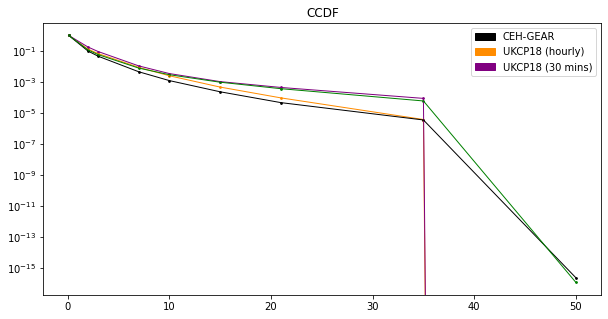

In [56]:
fig, ax = plt.subplots(figsize=(10,5))

results = [ukcp18_hrly_2001_2019_jja_GB_12km_results, ukcp18_30m_2001_2019_jja_GB_12km_results,cehgear_1990_2014_GB_jja_12km_results,NIMROD_2006_2019_jja_GB_12km_results]
colors = ['darkorange', 'purple', 'black', 'green']
plot_ccdf(ax,results, colors)

ax.set_yscale('log')
ax.set_title('CCDF')
patches = create_patches(['black', 'purple', 'darkorange', 'black'])
ax.legend(handles=patches);